In [5]:
import pandas as pd
import numpy as np

# 1. QVI_transaction_data

# Creating and interpreting high-level summaries of the data

In [8]:
transaction_dataset = pd.read_excel('QVI_transaction_data.xlsx')

In [9]:
transaction_dataset.head() 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [11]:
transaction_dataset.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [12]:
# Count unique values
print(f"\nTotal unique customers: {transaction_dataset['LYLTY_CARD_NBR'].nunique()}")
print(f"Total unique products: {transaction_dataset['PROD_NAME'].nunique()}")
print(f"Total transactions: {transaction_dataset.shape[0]}")


Total unique customers: 72637
Total unique products: 114
Total transactions: 264836


In [13]:
# Summary statistics for numerical columns
print("\nTransaction Data Description:")
transaction_dataset.describe()


Transaction Data Description:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
# Check top 10 most sold products
print("\nTop 10 Most Sold Products:")
transaction_dataset["PROD_NAME"].value_counts().head(10)


Top 10 Most Sold Products:


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: count, dtype: int64

In [15]:
# Extract brand name (Assuming the first word in the PRODUCT_NAME is the brand)
transaction_dataset["Brand"] = transaction_dataset["PROD_NAME"].apply(lambda x: x.split()[0])

# Extract pack size
transaction_dataset["Pack_Size"] = transaction_dataset["PROD_NAME"].str.extract(r'(\d+)').astype(float)

In [16]:
transaction_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175.0
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170.0
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150.0


# Finding Outliers and Removing These

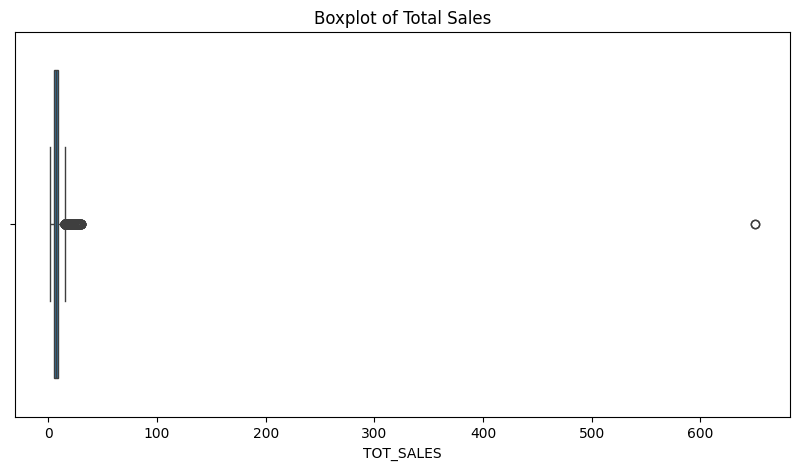

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=transaction_dataset, x="TOT_SALES")
plt.title("Boxplot of Total Sales")
plt.show()

# Interquartile Range (IQR) method to detect outliers
Q1 = transaction_dataset["TOT_SALES"].quantile(0.25)
Q3 = transaction_dataset["TOT_SALES"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Filtering out the outliers
filtered_dataset = transaction_dataset[(transaction_dataset["TOT_SALES"] >= lower_bound) & 
                                 (transaction_dataset["TOT_SALES"] <= upper_bound)]

In [20]:
print(f"\nTransactions before removing outliers: {transaction_dataset.shape[0]}")
print(f"Transactions after removing outliers: {filtered_dataset.shape[0]}")


Transactions before removing outliers: 264836
Transactions after removing outliers: 264258


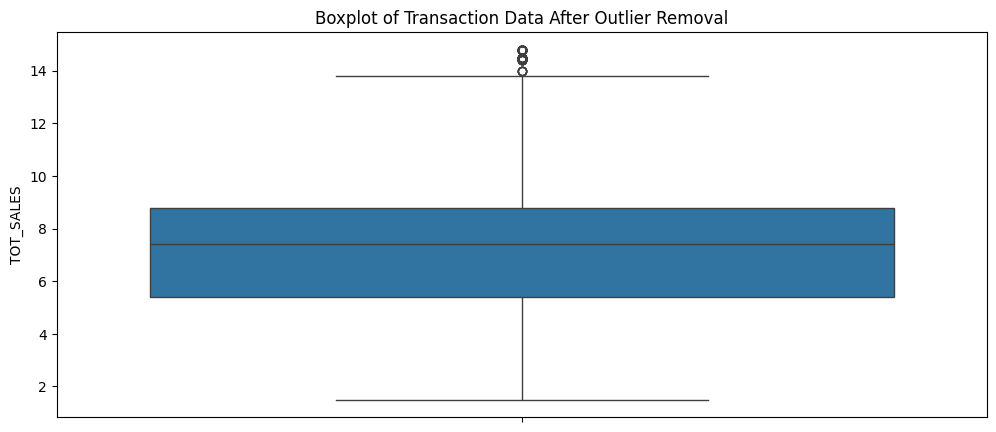

In [70]:
# Before and after outlier removal comparison
plt.figure(figsize=(12,5))
sns.boxplot(data=filtered_dataset["TOT_SALES"])
plt.title("Boxplot of Transaction Data After Outlier Removal")
plt.show()

# Checking Data Formats and Correcting

In [22]:
transaction_dataset.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
Brand              object
Pack_Size         float64
dtype: object

In [23]:
# Convert data types if necessary
transaction_dataset["DATE"] = pd.to_datetime(transaction_dataset["DATE"])

# Convert numerical values to float/int
transaction_dataset["TOT_SALES"] = transaction_dataset["TOT_SALES"].astype(float)
transaction_dataset["Pack_Size"] = pd.to_numeric(transaction_dataset["Pack_Size"], errors='coerce')

# Fill any missing values in Pack_Size (if needed)
transaction_dataset["Pack_Size"] = transaction_dataset["Pack_Size"].fillna(transaction_dataset["Pack_Size"].median())

# Ensure categorical columns are string
transaction_dataset["Brand"] = transaction_dataset["Brand"].astype(str)

# Recheck data types
print("\nUpdated Transaction Data Types:")
transaction_dataset.dtypes


Updated Transaction Data Types:


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
Brand                     object
Pack_Size                float64
dtype: object

# 2. QVI_purchase_behaviour

# Creating and interpreting high-level summaries of the data

In [47]:
# Load customer segmentation data  
customer_dataset = pd.read_csv("QVI_purchase_behaviour.csv")  

In [49]:
customer_dataset.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [51]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [57]:
customer_dataset.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [59]:
print("\nCustomer Data Description:")
customer_dataset.describe()


Customer Data Description:


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


# Finding Outliers and Removing These

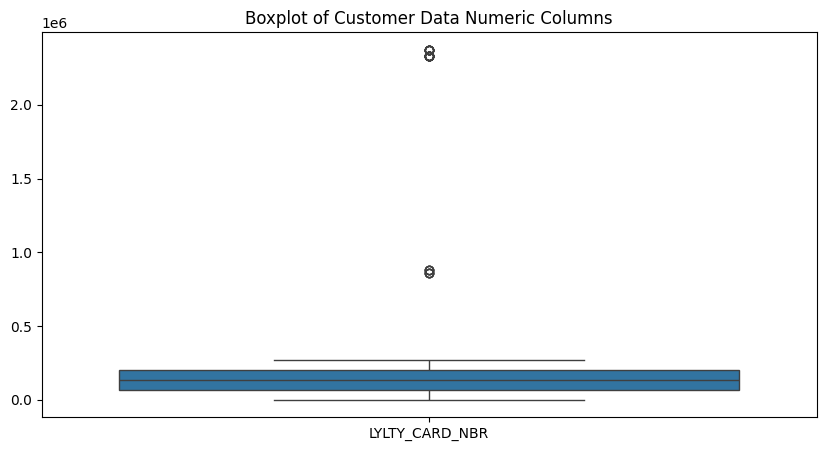

In [64]:
# Boxplot to visualize potential outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=customer_data)
plt.title("Boxplot of Customer Data Numeric Columns")
plt.show()

In [66]:
# Identify numeric columns
numeric_cols = customer_dataset.select_dtypes(include=["number"]).columns

# Create a copy of the data to avoid modifying the original
filtered_customer_data = customer_dataset.copy()

# Removing outliers for each numeric column
for col in numeric_cols:
    Q1 = customer_dataset[col].quantile(0.25)
    Q3 = customer_dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_customer_data = filtered_customer_data[(filtered_customer_data[col] >= lower_bound) & 
                                                    (filtered_customer_data[col] <= upper_bound)]

# Compare before and after removing outliers
print(f"Original customer data size: {customer_dataset.shape}")
print(f"Filtered customer data size (after outlier removal): {filtered_customer_data.shape}")


Original customer data size: (72637, 3)
Filtered customer data size (after outlier removal): (72603, 3)


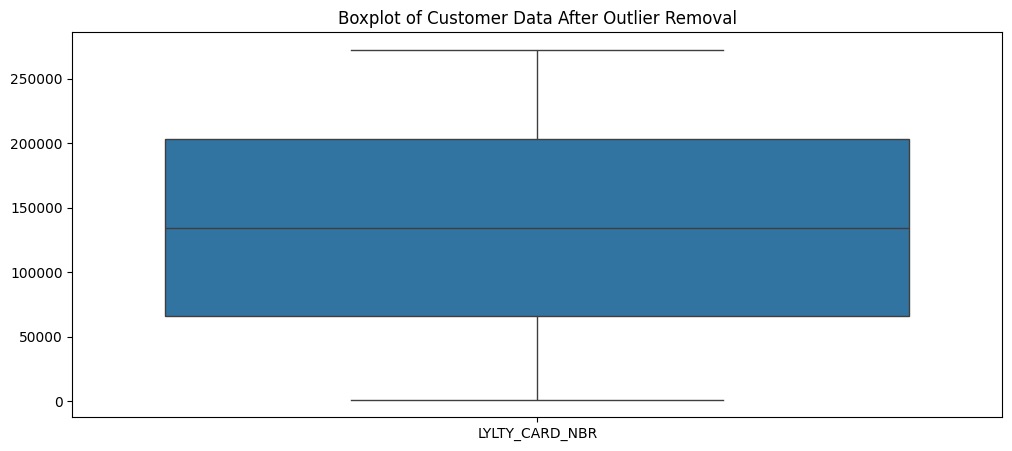

In [68]:
# Before and after outlier removal comparison
plt.figure(figsize=(12,5))
sns.boxplot(data=filtered_customer_data)
plt.title("Boxplot of Customer Data After Outlier Removal")
plt.show()

# Checking Data Formats and Correcting

In [73]:
# Check data types
print("\nCustomer Data Types:")
customer_dataset.dtypes


Customer Data Types:


LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object